In [1]:
from IPython.display import display, HTML

image_path = r"img.jpg"

display(HTML(f'<div style="text-align: center;margin-top:20px"><img src="{image_path}" style="max-width: 100%; height: 500px;" /></div>'))




# **Project Overvew**
  - **Data Exploration**
  - **Data Preprocessing**
  - **Feature Engineering**
  - **ML Models**
  - **Model Evaluations**
  - **Model Deployment**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score
from xgboost import XGBClassifier


In [3]:
df=pd.read_csv('/kaggle/input/dataset/Depression Student Dataset.csv')


# **Data Exploration**

In [4]:
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [5]:
df.tail()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
497,Male,26,5.0,2.0,More than 8 hours,Unhealthy,No,8,3,No,Yes
498,Male,24,2.0,1.0,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes
499,Female,23,3.0,5.0,5-6 hours,Healthy,No,1,5,Yes,No
500,Male,33,4.0,4.0,More than 8 hours,Healthy,No,8,1,Yes,No
501,Male,18,5.0,3.0,More than 8 hours,Unhealthy,No,6,2,Yes,Yes


In [6]:
df.sample(4)

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
186,Male,33,5.0,4.0,5-6 hours,Moderate,Yes,0,5,No,Yes
22,Male,31,2.0,4.0,More than 8 hours,Unhealthy,No,10,1,No,No
294,Female,31,1.0,4.0,More than 8 hours,Unhealthy,Yes,0,1,No,No
110,Female,20,1.0,3.0,7-8 hours,Healthy,Yes,0,5,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 502 non-null    object 
 1   Age                                    502 non-null    int64  
 2   Academic Pressure                      502 non-null    float64
 3   Study Satisfaction                     502 non-null    float64
 4   Sleep Duration                         502 non-null    object 
 5   Dietary Habits                         502 non-null    object 
 6   Have you ever had suicidal thoughts ?  502 non-null    object 
 7   Study Hours                            502 non-null    int64  
 8   Financial Stress                       502 non-null    int64  
 9   Family History of Mental Illness       502 non-null    object 
 10  Depression                             502 non-null    object 
dtypes: flo

In [8]:
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [9]:
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    125
1.0     99
5.0     98
4.0     92
2.0     88
Name: count, dtype: int64

In [10]:
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate     172
Unhealthy    169
Healthy      161
Name: count, dtype: int64

In [11]:
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    260
No     242
Name: count, dtype: int64

In [12]:
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     265
Yes    237
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Study Hours', ylabel='Depression'>

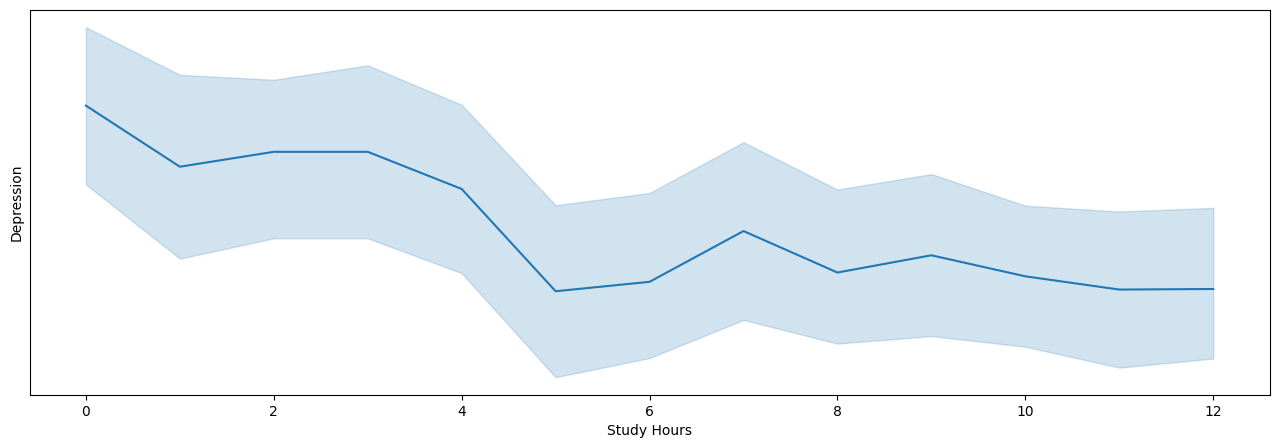

In [13]:
plt.figure(figsize=(16,5))
sns.lineplot(x=df['Study Hours'],y=df['Depression'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Depression'>

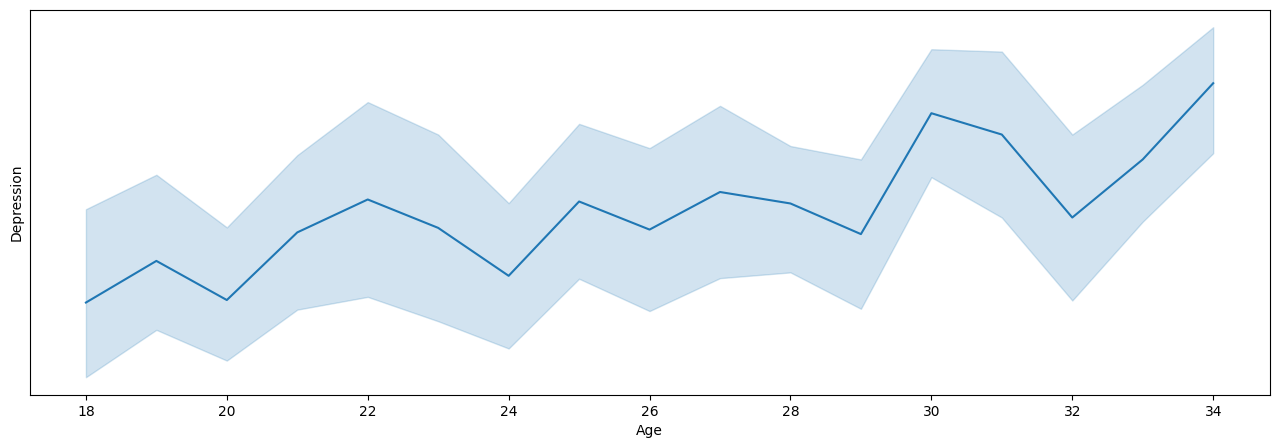

In [14]:
plt.figure(figsize=(16,5))
sns.lineplot(x=df['Age'],y=df['Depression'])

# Data Wrangling: 
  - Cleaning & Outliers
  - Preparation & Tranformation


In [15]:
df.isna().sum()

Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [16]:
df.duplicated().sum()

0

<Axes: >

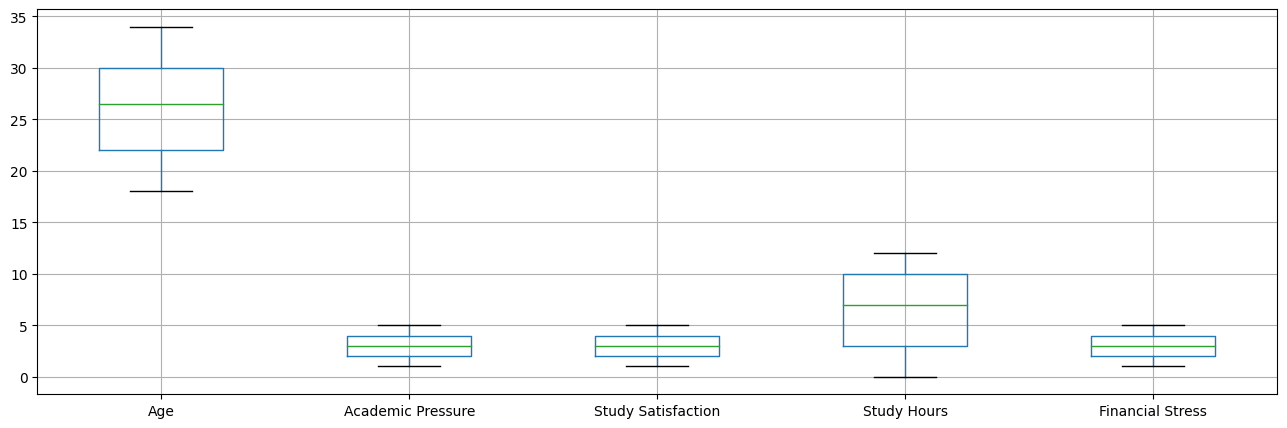

In [17]:
plt.figure(figsize=(16,5))
df.boxplot()

In [18]:
df.dtypes

Gender                                    object
Age                                        int64
Academic Pressure                        float64
Study Satisfaction                       float64
Sleep Duration                            object
Dietary Habits                            object
Have you ever had suicidal thoughts ?     object
Study Hours                                int64
Financial Stress                           int64
Family History of Mental Illness          object
Depression                                object
dtype: object

In [19]:
Ecoder=LabelEncoder()
df['Gender']=Ecoder.fit_transform(df['Gender'])
df['Depression']=Ecoder.fit_transform(df['Depression'])
df['Dietary Habits']=Ecoder.fit_transform(df['Dietary Habits'])
df['Family History of Mental Illness']=Ecoder.fit_transform(df['Family History of Mental Illness'])
df['Have you ever had suicidal thoughts ?']=Ecoder.fit_transform(df['Have you ever had suicidal thoughts ?'])

In [20]:
df['Sleep Duration'].value_counts()

Sleep Duration
7-8 hours            128
More than 8 hours    128
5-6 hours            123
Less than 5 hours    123
Name: count, dtype: int64

In [21]:
sleep_duration_numeric_mapping = {
    '7-8 hours': (7, 8),            # Range as (start, end)
    '5-6 hours': (5, 6),            # Range as (start, end)
    'More than 8 hours': (8.01, 24), # Open-ended range (>8.2)
    'Less than 5 hours': (0, 4)     # Open-ended range (<5)
}

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_duration_numeric_mapping)


# Access individual elements (if needed)
df['Sleep Duration Start'] = df['Sleep Duration'].map(lambda x: x[0])  
df['Sleep Duration End'] = df['Sleep Duration'].map(lambda x: x[1])    



In [22]:
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration Start,Sleep Duration End
0,1,28,2.0,4.0,"(7, 8)",1,1,9,2,1,0,7.00,8
1,1,28,4.0,5.0,"(5, 6)",0,1,7,1,1,0,5.00,6
2,1,25,1.0,3.0,"(5, 6)",2,1,10,4,0,1,5.00,6
3,1,23,1.0,4.0,"(8.01, 24)",2,1,7,2,1,0,8.01,24
4,0,31,1.0,5.0,"(8.01, 24)",0,1,4,2,1,0,8.01,24


# Feature Engineering
 - Feature Selection
 - Normalization


In [23]:
df.corr(numeric_only=True)['Depression']

Gender                                   0.031683
Age                                     -0.215625
Academic Pressure                        0.476259
Study Satisfaction                      -0.293484
Dietary Habits                           0.186685
Have you ever had suicidal thoughts ?    0.466296
Study Hours                              0.200441
Financial Stress                         0.296846
Family History of Mental Illness         0.056087
Depression                               1.000000
Sleep Duration Start                    -0.035794
Sleep Duration End                      -0.064869
Name: Depression, dtype: float64

                                  Feature  Importance
5   Have you ever had suicidal thoughts ?    0.265995
2                       Academic Pressure    0.256583
1                                     Age    0.101870
7                        Financial Stress    0.101225
3                      Study Satisfaction    0.098890
6                             Study Hours    0.079602
4                          Dietary Habits    0.041734
10                     Sleep Duration End    0.018444
9                    Sleep Duration Start    0.015453
8        Family History of Mental Illness    0.010370
0                                  Gender    0.009834


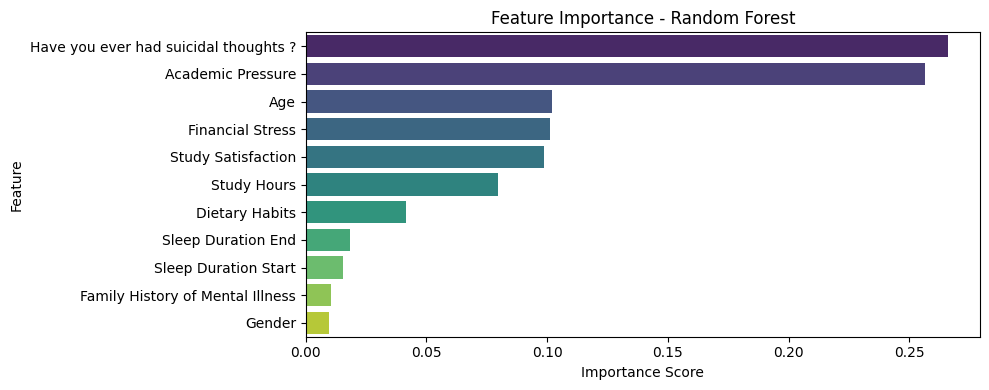

In [24]:


# Select only numerical columns
numerical_df = df.select_dtypes(include='number')

# Split features and target
X = numerical_df.drop('Depression', axis=1)
y = df['Depression']

# Fit RandomForest model
model = RandomForestClassifier(n_estimators=70, max_depth=5)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

# Plotting the feature importance
plt.figure(figsize=(10, 4))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [25]:

correlation_with_target = {
    "Gender": 0.031683,
    "Age": -0.215625,
    "Academic Pressure": 0.476259,
    "Study Satisfaction": -0.293484,
    "Dietary Habits": 0.186685,
    "Have you ever had suicidal thoughts ?": 0.466296,
    "Study Hours": 0.200441,
    "Financial Stress": 0.296846,
    "Family History of Mental Illness": 0.056087,
    "Depression": 1.000000,
    "Sleep Duration Start": -0.035794,
    "Sleep Duration End": -0.064869
}

correlation_series = pd.Series(correlation_with_target)

threshold = 0.15  

features_to_keep = correlation_series[correlation_series.abs() >= threshold].index.tolist()

df_filtered = df[features_to_keep]

df_filtered

,Age,Academic Pressure,Study Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Depression
0,28,2.0,4.0,1,1,9,2,0
1,28,4.0,5.0,0,1,7,1,0
2,25,1.0,3.0,2,1,10,4,1
3,23,1.0,4.0,2,1,7,2,0
4,31,1.0,5.0,0,1,4,2,0
...,...,...,...,...,...,...,...,...
497,26,5.0,2.0,2,0,8,3,1
498,24,2.0,1.0,2,1,8,5,1
499,23,3.0,5.0,0,0,1,5,0
500,33,4.0,4.0,0,0,8,1,0


In [26]:
df_filtered.corr()['Depression']

Age                                     -0.215625
Academic Pressure                        0.476259
Study Satisfaction                      -0.293484
Dietary Habits                           0.186685
Have you ever had suicidal thoughts ?    0.466296
Study Hours                              0.200441
Financial Stress                         0.296846
Depression                               1.000000
Name: Depression, dtype: float64

In [27]:
df_filtered.sample(4)

,Age,Academic Pressure,Study Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Depression
385,21,2.0,1.0,0,1,1,4,1
396,32,1.0,3.0,0,1,5,4,0
231,27,5.0,2.0,0,1,8,1,1
317,19,5.0,2.0,0,1,11,3,1


In [28]:
Scaler=MinMaxScaler()
df_filtered['Age']=Scaler.fit_transform(df_filtered[['Age']])

/tmp/ipykernel_156/2135084840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Age']=Scaler.fit_transform(df_filtered[['Age']])


## Modeling :
  - HyperParameter Tuning 
  - Create model
  - Choose Best Hyperparameter
  - Train & Test
  - Model Evaluation
  - Deployment

In [41]:
# !pip install --no-deps sklearn-genetic-opt
from sklearn.naive_bayes import GaussianNB

from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Prepare data
X = df_filtered[['Age','Academic Pressure','Study Satisfaction','Dietary Habits',
                 'Have you ever had suicidal thoughts ?','Study Hours','Financial Stress']]
y = df_filtered['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and genetic search spaces
models_params = {
    'SVM': (SVC(), {
        'C': Continuous(0.1, 10),
        'kernel': Categorical(['linear', 'rbf']),
        'gamma': Categorical(['scale', 'auto'])
    }),
    'RandomForest': (RandomForestClassifier(), {
        'n_estimators': Integer(10, 100),
        'max_depth': Integer(5, 20),
        'criterion': Categorical(['gini', 'entropy'])
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': Integer(3, 20),
        'weights': Categorical(['uniform', 'distance']),
        'p': Integer(1, 2)  # 1: Manhattan, 2: Euclidean
    }),
    'LogisticRegression': (LogisticRegression(max_iter=1000), {
        'C': Continuous(0.01, 10),
        'solver': Categorical(['liblinear', 'lbfgs'])
    }),
        'NaiveBayes': (GaussianNB(), {
'var_smoothing': Continuous(1e-11, 1e-7)    }),
}


# Run genetic search for each model
for name, (model, param_grid) in models_params.items():
    print(f"\n🔍 Running Genetic Search for: {name}")
    
    search = GASearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        verbose=True,
        n_jobs=-1,
        population_size=10,
        generations=5,
        # random_state=42  # Ensuring reproducibility
    )
    
    # Fit the model using the genetic algorithm search
    search.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = search.predict(X_test)
    
    # Calculate accuracy score
    acc = accuracy_score(y_test, y_pred)
    
    # Print best parameters and accuracy
    print(f"✅ Best params for {name}: {search.best_params_}")
    print(f"✅ Accuracy on test set: {acc:.4f}")



🔍 Running Genetic Search for: SVM
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.918463	0.0410077  	0.952716   	0.855247   
1  	20    	0.945194	0.0241692  	0.955185   	0.872747   
2  	20    	0.954194	0.00122609 	0.955216   	0.952685   
3  	20    	0.954694	0.000997009	0.955216   	0.952685   
4  	20    	0.954951	0.000744998	0.955216   	0.952716   
5  	20    	0.95521 	1.23457e-05	0.955216   	0.955185   
✅ Best params for SVM: {'C': 3.23646065279777, 'kernel': 'linear', 'gamma': 'auto'}
✅ Accuracy on test set: 0.9505

🔍 Running Genetic Search for: RandomForest
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.883352	0.00730948 	0.892747   	0.870309   
1  	20    	0.887361	0.00596477 	0.892747   	0.875401   
2  	20    	0.889861	0.0041119  	0.892747   	0.877932   
3  	20    	0.88988 	0.00243954 	0.892747   	0.88287    
4  	20    	0.890145	0.00077935 	0.890432   	0.887809   
5  	20    	0.88916 	0.00375319 	0.890432   	0.877901   
✅ Best params for Rand

/usr/local/lib/python3.11/dist-packages/sklearn_genetic/genetic_search.py:288: UserWarning: Warning, only one parameter was provided to the param_grid, the optimization routine might not have effect or it could lead to errors, it's advised to use at least 2 parameters
  warnings.warn(


gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.927593	0          	0.927593   	0.927593   
1  	20    	0.927593	0          	0.927593   	0.927593   
2  	20    	0.927593	0          	0.927593   	0.927593   
3  	20    	0.927593	0          	0.927593   	0.927593   
4  	20    	0.927593	0          	0.927593   	0.927593   
5  	20    	0.927593	0          	0.927593   	0.927593   
✅ Best params for NaiveBayes: {'var_smoothing': 6.966704056030733e-08}
✅ Accuracy on test set: 0.9307



✅ Evaluation for Logistic Regression:

Accuracy: 0.9406
F1 Macro Score: 0.9403
Classification Report:
               precision    recall  f1-score   support

Not Depressed       0.96      0.92      0.94        48
    Depressed       0.93      0.96      0.94        53

     accuracy                           0.94       101
    macro avg       0.94      0.94      0.94       101
 weighted avg       0.94      0.94      0.94       101



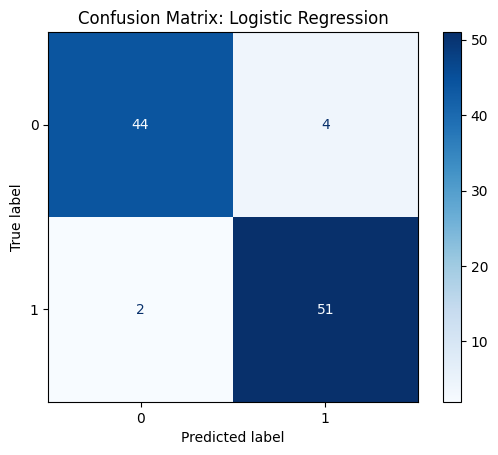


✅ Evaluation for SVM:

Accuracy: 0.9406
F1 Macro Score: 0.9403
Classification Report:
               precision    recall  f1-score   support

Not Depressed       0.96      0.92      0.94        48
    Depressed       0.93      0.96      0.94        53

     accuracy                           0.94       101
    macro avg       0.94      0.94      0.94       101
 weighted avg       0.94      0.94      0.94       101



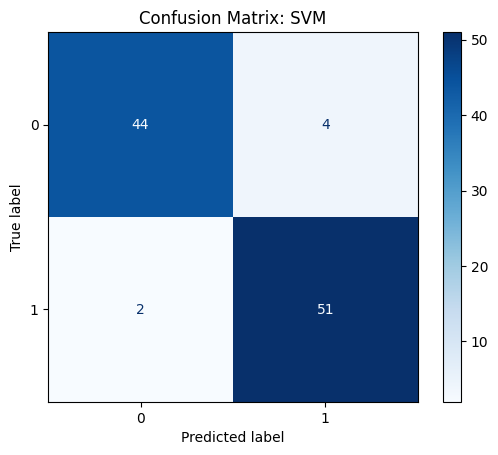


✅ Evaluation for Random Forest:

Accuracy: 0.9109
F1 Macro Score: 0.9100
Classification Report:
               precision    recall  f1-score   support

Not Depressed       0.95      0.85      0.90        48
    Depressed       0.88      0.96      0.92        53

     accuracy                           0.91       101
    macro avg       0.92      0.91      0.91       101
 weighted avg       0.91      0.91      0.91       101



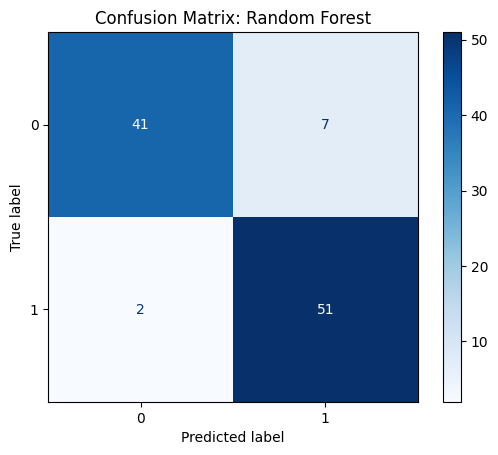


✅ Evaluation for XGBoost:

Accuracy: 0.9208
F1 Macro Score: 0.9198
Classification Report:
               precision    recall  f1-score   support

Not Depressed       0.98      0.85      0.91        48
    Depressed       0.88      0.98      0.93        53

     accuracy                           0.92       101
    macro avg       0.93      0.92      0.92       101
 weighted avg       0.93      0.92      0.92       101



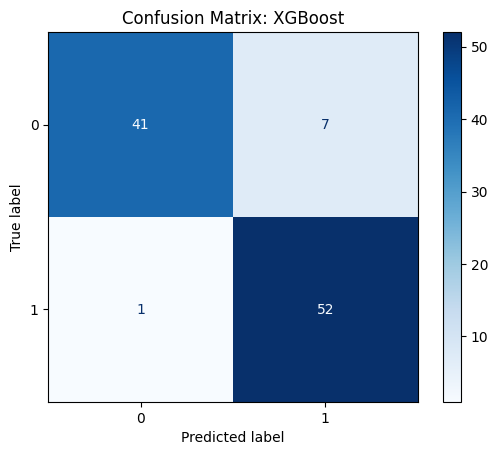


✅ Evaluation for K-Nearest Neighbors:

Accuracy: 0.8416
F1 Macro Score: 0.8408
Classification Report:
               precision    recall  f1-score   support

Not Depressed       0.85      0.81      0.83        48
    Depressed       0.84      0.87      0.85        53

     accuracy                           0.84       101
    macro avg       0.84      0.84      0.84       101
 weighted avg       0.84      0.84      0.84       101



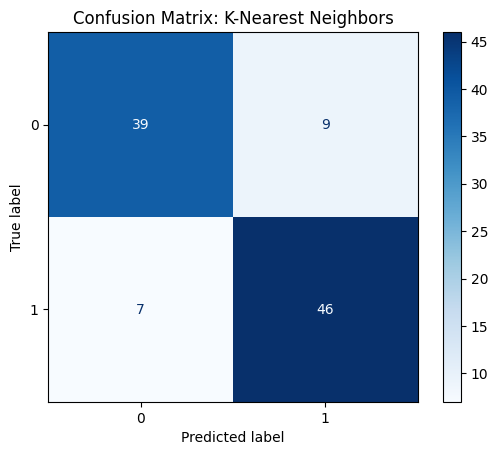


✅ Evaluation for Naive Bayes:

Accuracy: 0.9307
F1 Macro Score: 0.9304
Classification Report:
               precision    recall  f1-score   support

Not Depressed       0.94      0.92      0.93        48
    Depressed       0.93      0.94      0.93        53

     accuracy                           0.93       101
    macro avg       0.93      0.93      0.93       101
 weighted avg       0.93      0.93      0.93       101



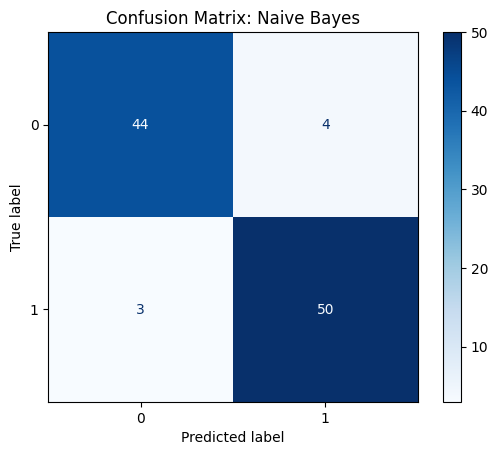

In [42]:
# Best parameters based on your previous results
best_params = {
    'LogisticRegression': {'C': 9.694471804958633, 'solver': 'lbfgs'},
    'XGBoost': {
        'n_estimators': 132, 'max_depth': 3,
        'learning_rate': 0.2547596810276317, 'subsample': 0.6878902464976121
    },
    'SVM': {'C': 2.694589535610527, 'kernel': 'linear', 'gamma': 'scale'},
    'RandomForest': {'n_estimators': 79, 'max_depth': 19, 'criterion': 'gini'},
    'KNN': {'n_neighbors': 17, 'weights': 'uniform', 'p': 1},
    'NaiveBayes': {'var_smoothing': 6.966704056030733e-08}
}

# Define models with best parameters
lr = LogisticRegression(**best_params['LogisticRegression'], max_iter=1000)
svm = SVC(**best_params['SVM'])
rf = RandomForestClassifier(**best_params['RandomForest'])
xgb = XGBClassifier(**best_params['XGBoost'], use_label_encoder=False, eval_metric='logloss')
knn = KNeighborsClassifier(**best_params['KNN'])
nb = GaussianNB(var_smoothing=best_params['NaiveBayes']['var_smoothing'])

# Prepare data (replace df_filtered with your actual DataFrame)
X = df_filtered[['Age', 'Academic Pressure', 'Study Satisfaction', 'Dietary Habits',
                 'Have you ever had suicidal thoughts ?', 'Study Hours', 'Financial Stress']]
y = df_filtered['Depression']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot the confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

# All models in a dictionary
models = {
    'Logistic Regression': lr,
    'SVM': svm,
    'Random Forest': rf,
    'XGBoost': xgb,
    'K-Nearest Neighbors': knn,
    'Naive Bayes': nb
}

# Evaluate each model
for model_name, model in models.items():
    print(f"\n✅ Evaluation for {model_name}:\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # F1 Macro Score
    f1 = f1_score(y_test, y_pred, average='macro')

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=["Not Depressed", "Depressed"])
    
    # Output
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Macro Score: {f1:.4f}")
    print(f"Classification Report:\n{report}")
    
    # Confusion Matrix
    plot_confusion_matrix(y_test, y_pred, f"Confusion Matrix: {model_name}")


In [43]:
import joblib

# Save the best models
joblib.dump(svm, "best_svm_model.pkl")
print("✅ Saved SVM model as best_svm_model.pkl")

joblib.dump(rf, "best_rf_model.pkl")
print("✅ Saved Random Forest model as best_rf_model.pkl")

joblib.dump(lr, "best_lr_model.pkl")
print("✅ Saved Logistic Regression model as best_lr_model.pkl")

joblib.dump(xgb, "best_xgb_model.pkl")
print("✅ Saved XGBoost model as best_xgb_model.pkl")

joblib.dump(knn, "best_knn_model.pkl")
print("✅ Saved KNN model as best_knn_model.pkl")

joblib.dump(nb, "best_nb_model.pkl")
print("✅ Saved Naive Bayes model as best_nb_model.pkl")


✅ Saved SVM model as best_svm_model.pkl
✅ Saved Random Forest model as best_rf_model.pkl
✅ Saved Logistic Regression model as best_lr_model.pkl
✅ Saved XGBoost model as best_xgb_model.pkl
✅ Saved KNN model as best_knn_model.pkl
✅ Saved Naive Bayes model as best_nb_model.pkl


## **DL Model And Evalutions**

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.5287 - loss: 0.7800 - val_accuracy: 0.5545 - val_loss: 0.6598
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6430 - loss: 0.6675 - val_accuracy: 0.7921 - val_loss: 0.5596
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7089 - loss: 0.6082 - val_accuracy: 0.8020 - val_loss: 0.5475
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7068 - loss: 0.5855 - val_accuracy: 0.8218 - val_loss: 0.4705
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7482 - loss: 0.5523 - val_accuracy: 0.8218 - val_loss: 0.4327
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7676 - loss: 0.4941 - val_accuracy: 0.8218 - val_loss: 0.3971
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8195 - loss: 0.4246 - val_accuracy: 0.8317 - val_loss: 0.3704
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7748 - loss: 0.4611 - val_accuracy: 0.8317 - val_loss: 0

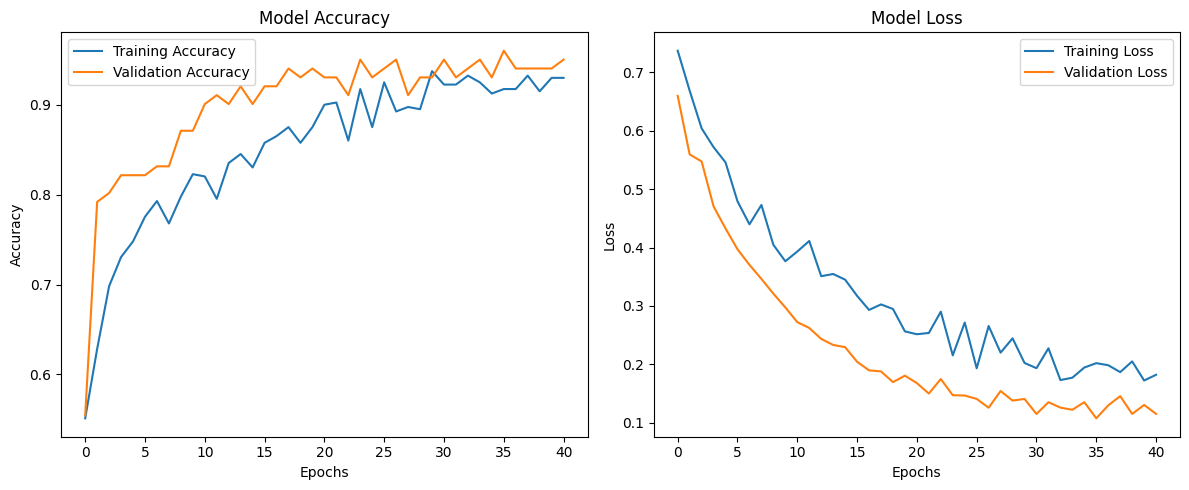

Classification Report:
               precision    recall  f1-score   support

Not Depressed       1.00      0.92      0.96        48
    Depressed       0.93      1.00      0.96        53

     accuracy                           0.96       101
    macro avg       0.96      0.96      0.96       101
 weighted avg       0.96      0.96      0.96       101



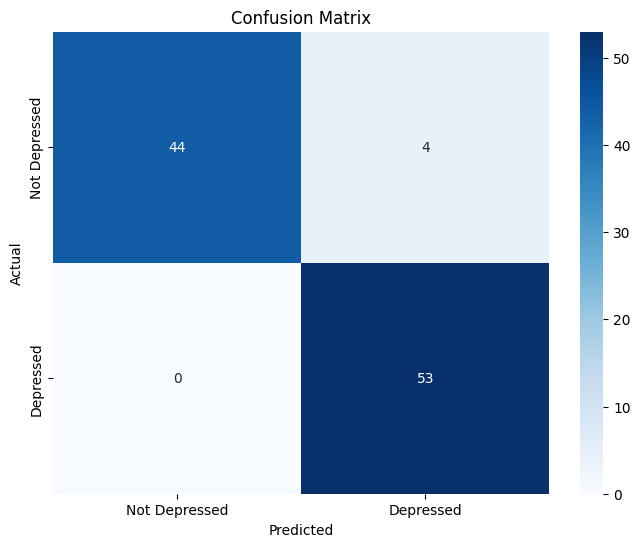

Accuracy: 0.9604
Model saved as optimized_ann_model.h5


In [48]:
# Define the optimized ANN model
def create_optimized_ann(input_dim):
    model = Sequential()
    # Add layers with increased neurons and dropout to prevent overfitting
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))  # Dropout layer to prevent overfitting
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Prepare data (Use the same features and target as before)
X = df_filtered[['Age', 'Academic Pressure', 'Study Satisfaction', 'Dietary Habits', 
                 'Have you ever had suicidal thoughts ?', 'Study Hours', 'Financial Stress']]
y = df_filtered['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the optimized ANN model
ann_model = create_optimized_ann(X_train.shape[1])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), 
                        callbacks=[early_stopping])

# Evaluate the model
y_pred = (ann_model.predict(X_test) > 0.5).astype("int32")

# Accuracy score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

# Classification Report
report = classification_report(y_test, y_pred, target_names=["Not Depressed", "Depressed"])

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the results
# 1. Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 2. Classification Report
print(f"Classification Report:\n{report}")

# 3. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Depressed", "Depressed"], yticklabels=["Not Depressed", "Depressed"])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Output accuracy
print(f"Accuracy: {acc:.4f}")

# Save the trained model
ann_model.save("optimized_ann_model.h5")  # Save the model in HDF5 format
print("Model saved as optimized_ann_model.h5")
